In [58]:
import seaborn as sns
import pandas as pd
import numpy as np

In [59]:
import pandas._testing as tm

def unpivot(frame):
     N, K = frame.shape
     data = {
         "value": frame.to_numpy().ravel("F"),
         "variable": np.asarray(frame.columns).repeat(N),
         "date": np.tile(np.asarray(frame.index), K),
     }
     return pd.DataFrame(data, columns=["date", "variable", "value"])

df = unpivot(tm.makeTimeDataFrame(3))

# pivot

In [60]:
df

,date,variable,value
0,2000-01-03,A,1.213211
1,2000-01-04,A,-1.574683
2,2000-01-05,A,-1.686708
3,2000-01-03,B,-0.425667
4,2000-01-04,B,1.895768
5,2000-01-05,B,-0.403591
6,2000-01-03,C,-0.238115
7,2000-01-04,C,-0.913155
8,2000-01-05,C,0.960666
9,2000-01-03,D,-0.702781


In [61]:
filtered = df[df.variable == 'A']
filtered

,date,variable,value
0,2000-01-03,A,1.213211
1,2000-01-04,A,-1.574683
2,2000-01-05,A,-1.686708


In [75]:
pivoted = df.pivot(index='date', columns='variable', values='value')
pivoted

variable,A,B,C,D
date,,,,
2000-01-03,1.213211,-0.425667,-0.238115,-0.702781
2000-01-04,-1.574683,1.895768,-0.913155,1.063769
2000-01-05,-1.686708,-0.403591,0.960666,-0.869189


<AxesSubplot:xlabel='variable', ylabel='date'>

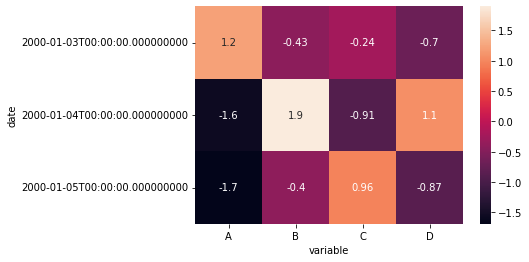

In [64]:
sns.heatmap(pivoted, cbar=True, annot=True)

In [70]:
a = pivoted.melt(id_vars='A', value_vars='D')
a

,A,variable,value
0,1.213211,D,-0.702781
1,-1.574683,D,1.063769
2,-1.686708,D,-0.869189


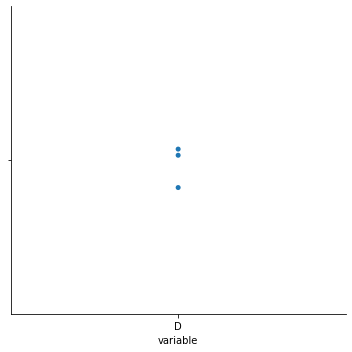

In [69]:
sns.catplot(data=a, x='variable')

In [71]:
pivoted

variable,A,B,C,D
date,,,,
2000-01-03,1.213211,-0.425667,-0.238115,-0.702781
2000-01-04,-1.574683,1.895768,-0.913155,1.063769
2000-01-05,-1.686708,-0.403591,0.960666,-0.869189


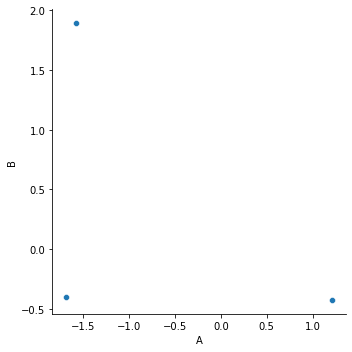

In [73]:
sns.relplot(data=pivoted, x='A', y='B', kind='scatter')

In [7]:
df['value2'] = df['value'] * 2
df

,date,variable,value,value2
0,2000-01-03,A,0.535128,1.070257
1,2000-01-04,A,0.017579,0.035157
2,2000-01-05,A,0.852607,1.705213
3,2000-01-03,B,-0.795593,-1.591185
4,2000-01-04,B,-0.270135,-0.540270
5,2000-01-05,B,-1.447411,-2.894823
6,2000-01-03,C,-0.920509,-1.841017
7,2000-01-04,C,-1.702858,-3.405716
8,2000-01-05,C,0.087934,0.175869
9,2000-01-03,D,0.659476,1.318952


In [8]:
pivoted = df.pivot(columns='variable', index='date')
pivoted

value                                  value2            \
variable           A         B         C         D         A         B   
date                                                                     
2000-01-03  0.535128 -0.795593 -0.920509  0.659476  1.070257 -1.591185   
2000-01-04  0.017579 -0.270135 -1.702858 -2.159243  0.035157 -0.540270   
2000-01-05  0.852607 -1.447411  0.087934 -1.240127  1.705213 -2.894823   

                                
variable           C         D  
date                            
2000-01-03 -1.841017  1.318952  
2000-01-04 -3.405716 -4.318485  
2000-01-05  0.175869 -2.480255

In [9]:
pivoted['value2']

variable,A,B,C,D
date,,,,
2000-01-03,1.070257,-1.591185,-1.841017,1.318952
2000-01-04,0.035157,-0.540270,-3.405716,-4.318485
2000-01-05,1.705213,-2.894823,0.175869,-2.480255


# stack & unstack

In [10]:
tuples = list(
   ....:     zip(
   ....:         *[
   ....:             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ....:             ["one", "two", "one", "two", "one", "two", "one", "two"],
   ....:         ]
   ....:     )
   ....: )
   ....: 

In [11]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df2 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2

A         B
first second                    
bar   one    -0.957025 -0.961550
      two     0.717507  1.353095
baz   one    -1.635879  0.591038
      two     1.768663 -0.163925
foo   one     0.945039 -0.303968
      two     1.778766  0.965533
qux   one     1.451595  0.245569
      two    -1.000895  0.813951

In [86]:
stacked.index

MultiIndex([('bar', 'one', 'cat'),
            ('bar', 'one', 'dog'),
            ('bar', 'two', 'cat'),
            ('bar', 'two', 'dog'),
            ('baz', 'one', 'cat'),
            ('baz', 'one', 'dog'),
            ('foo', 'one', 'cat'),
            ('foo', 'one', 'dog'),
            ('foo', 'two', 'cat'),
            ('foo', 'two', 'dog'),
            ('qux', 'two', 'cat'),
            ('qux', 'two', 'dog')],
           names=['first', 'second', 'animal'])

In [13]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.957025 -1.635879  0.945039  1.451595
       B -0.961550  0.591038 -0.303968  0.245569
two    A  0.717507  1.768663  1.778766 -1.000895
       B  1.353095 -0.163925  0.965533  0.813951

In [14]:
columns = pd.MultiIndex.from_tuples(
   ....:     [
   ....:         ("A", "cat", "long"),
   ....:         ("B", "cat", "long"),
   ....:         ("A", "dog", "short"),
   ....:         ("B", "dog", "short"),
   ....:     ],
   ....:     names=["exp", "animal", "hair_length"],
   ....: )
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df

exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,0.665674,0.927236,1.717325,-1.345505
1,0.243615,1.404295,0.123375,0.787802
2,-0.451096,0.711302,-1.297479,0.495081
3,-0.469607,0.074362,0.529236,-0.212062


In [15]:
df.stack(level=['animal','exp'])

hair_length       long     short
  animal exp                    
0 cat    A    0.665674       NaN
         B    0.927236       NaN
  dog    A         NaN  1.717325
         B         NaN -1.345505
1 cat    A    0.243615       NaN
         B    1.404295       NaN
  dog    A         NaN  0.123375
         B         NaN  0.787802
2 cat    A   -0.451096       NaN
         B    0.711302       NaN
  dog    A         NaN -1.297479
         B         NaN  0.495081
3 cat    A   -0.469607       NaN
         B    0.074362       NaN
  dog    A         NaN  0.529236
         B         NaN -0.212062

In [16]:
df.stack(level=['animal','exp']).columns

Index(['long', 'short'], dtype='object', name='hair_length')

In [17]:
columns = pd.MultiIndex.from_tuples(
   ....:     [
   ....:         ("A", "cat"),
   ....:         ("B", "dog"),
   ....:         ("B", "cat"),
   ....:         ("A", "dog"),
   ....:     ],
   ....:     names=["exp", "animal"],
   ....: )

In [18]:
index = pd.MultiIndex.from_product(
   ....:     [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
   ....: )
   ....: 

In [19]:
df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.769006  1.023686  1.296759 -0.222508
      two     1.311063  1.322916  0.361700 -1.539850
baz   one    -0.944142  0.669056 -0.882533 -1.407197
      two    -0.413164 -0.660574  1.497381 -0.506545
foo   one    -0.102006 -0.838862  0.531666 -0.849723
      two    -0.543611 -0.484556  1.672672  1.157366
qux   one     0.286776 -0.589552  1.280517  1.580868
      two    -1.086389 -1.006073  0.274700  1.286861

In [20]:
df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
df2

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.769006  1.023686  1.296759 -0.222508
      two     1.311063  1.322916  0.361700 -1.539850
baz   one    -0.944142  0.669056 -0.882533 -1.407197
foo   one    -0.102006 -0.838862  0.531666 -0.849723
      two    -0.543611 -0.484556  1.672672  1.157366
qux   two    -1.086389 -1.006073  0.274700  1.286861

In [21]:
df2.stack('exp')

animal                 cat       dog
first second exp                    
bar   one    A   -0.769006 -0.222508
             B    1.296759  1.023686
      two    A    1.311063 -1.539850
             B    0.361700  1.322916
baz   one    A   -0.944142 -1.407197
             B   -0.882533  0.669056
foo   one    A   -0.102006 -0.849723
             B    0.531666 -0.838862
      two    A   -0.543611  1.157366
             B    1.672672 -0.484556
qux   two    A   -1.086389  1.286861
             B    0.274700 -1.006073

In [22]:
df3 = df.iloc[[0, 1, 4, 7], [1, 2]]
df3

exp                  B          
animal             dog       cat
first second                    
bar   one     1.023686  1.296759
      two     1.322916  0.361700
foo   one    -0.838862  0.531666
qux   two    -1.006073  0.274700

In [23]:
df3.unstack('second')

exp            B                            
animal       dog                 cat        
second       one       two       one     two
first                                       
bar     1.023686  1.322916  1.296759  0.3617
foo    -0.838862       NaN  0.531666     NaN
qux          NaN -1.006073       NaN  0.2747

In [24]:
df3.unstack('second', fill_value=1e9)

exp                B                                          
animal           dog                         cat              
second           one           two           one           two
first                                                         
bar     1.023686e+00  1.322916e+00  1.296759e+00  3.617003e-01
foo    -8.388619e-01  1.000000e+09  5.316664e-01  1.000000e+09
qux     1.000000e+09 -1.006073e+00  1.000000e+09  2.746996e-01

In [25]:
df[:3]

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.769006  1.023686  1.296759 -0.222508
      two     1.311063  1.322916  0.361700 -1.539850
baz   one    -0.944142  0.669056 -0.882533 -1.407197

In [26]:
df[:3].stack(0)

animal                 cat       dog
first second exp                    
bar   one    A   -0.769006 -0.222508
             B    1.296759  1.023686
      two    A    1.311063 -1.539850
             B    0.361700  1.322916
baz   one    A   -0.944142 -1.407197
             B   -0.882533  0.669056

# melt

In [27]:
cheese = pd.DataFrame(
   ....:     {
   ....:         "first": ["John", "Mary"],
   ....:         "last": ["Doe", "Bo"],
   ....:         "height": [5.5, 6.0],
   ....:         "weight": [130, 150],
   ....:     }
   ....: )
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [28]:
cheese.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [29]:
cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [30]:
cheese.melt(id_vars=['first', 'last'], var_name='quantity')

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [31]:
index = pd.MultiIndex.from_tuples([("person", "A"), ("person", "B")])

In [32]:
cheese = pd.DataFrame(
        {
            "first": ["John", "Mary"],
            "last": ["Doe", "Bo"],
            "height": [5.5, 6.0],
            "weight": [130, 150],
        },
        index=index,
    ) 

cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [33]:
cheese.melt(id_vars=['first', 'last'])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [34]:
cheese.melt(id_vars=['first'])

,first,variable,value
0,John,last,Doe
1,Mary,last,Bo
2,John,height,5.5
3,Mary,height,6.0
4,John,weight,130
5,Mary,weight,150


In [35]:
cheese.melt(id_vars='first', var_name='aaa', value_vars='last', value_name='last22', ignore_index=False)

first   aaa last22
person A  John  last    Doe
       B  Mary  last     Bo

In [36]:
dft = pd.DataFrame(
   ....:     {
   ....:         "A1970": {0: "a", 1: "b", 2: "c"},
   ....:         "A1980": {0: "d", 1: "e", 2: "f"},
   ....:         "B1970": {0: 2.5, 1: 1.2, 2: 0.7},
   ....:         "B1980": {0: 3.2, 1: 1.3, 2: 0.1},
   ....:         "X": dict(zip(range(3), np.random.randn(3))),
   ....:     }
   ....: )
   ....: 

In [37]:
dft["id"] = dft.index
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,0.220433,0
1,b,e,1.2,1.3,0.330239,1
2,c,f,0.7,0.1,-1.058183,2


In [38]:
pd.wide_to_long(dft, ["A", "B"], i="id", j="year")

,,X,A,B
id,year,,,
0,1970,0.220433,a,2.5
1,1970,0.330239,b,1.2
2,1970,-1.058183,c,0.7
0,1980,0.220433,d,3.2
1,1980,0.330239,e,1.3
2,1980,-1.058183,f,0.1


# Combining with stats and GroupBy

In [39]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.769006  1.023686  1.296759 -0.222508
      two     1.311063  1.322916  0.361700 -1.539850
baz   one    -0.944142  0.669056 -0.882533 -1.407197
      two    -0.413164 -0.660574  1.497381 -0.506545
foo   one    -0.102006 -0.838862  0.531666 -0.849723
      two    -0.543611 -0.484556  1.672672  1.157366
qux   one     0.286776 -0.589552  1.280517  1.580868
      two    -1.086389 -1.006073  0.274700  1.286861

In [40]:
df.stack(-1)

exp                         A         B
first second animal                    
bar   one    cat    -0.769006  1.296759
             dog    -0.222508  1.023686
      two    cat     1.311063  0.361700
             dog    -1.539850  1.322916
baz   one    cat    -0.944142 -0.882533
             dog    -1.407197  0.669056
      two    cat    -0.413164  1.497381
             dog    -0.506545 -0.660574
foo   one    cat    -0.102006  0.531666
             dog    -0.849723 -0.838862
      two    cat    -0.543611  1.672672
             dog     1.157366 -0.484556
qux   one    cat     0.286776  1.280517
             dog     1.580868 -0.589552
      two    cat    -1.086389  0.274700
             dog     1.286861 -1.006073

In [41]:
df.stack().mean(1).unstack()

animal             cat       dog
first second                    
bar   one     0.263877  0.400589
      two     0.836382 -0.108467
baz   one    -0.913337 -0.369071
      two     0.542108 -0.583560
foo   one     0.214830 -0.844292
      two     0.564530  0.336405
qux   one     0.783646  0.495658
      two    -0.405845  0.140394

In [42]:
df

exp                  A         B                   A
animal             cat       dog       cat       dog
first second                                        
bar   one    -0.769006  1.023686  1.296759 -0.222508
      two     1.311063  1.322916  0.361700 -1.539850
baz   one    -0.944142  0.669056 -0.882533 -1.407197
      two    -0.413164 -0.660574  1.497381 -0.506545
foo   one    -0.102006 -0.838862  0.531666 -0.849723
      two    -0.543611 -0.484556  1.672672  1.157366
qux   one     0.286776 -0.589552  1.280517  1.580868
      two    -1.086389 -1.006073  0.274700  1.286861

In [43]:
# same result
df.groupby(level=1, axis=1).mean()

animal             cat       dog
first second                    
bar   one     0.263877  0.400589
      two     0.836382 -0.108467
baz   one    -0.913337 -0.369071
      two     0.542108 -0.583560
foo   one     0.214830 -0.844292
      two     0.564530  0.336405
qux   one     0.783646  0.495658
      two    -0.405845  0.140394

In [44]:
df.stack(0).groupby(level=1).mean()

animal,cat,dog
second,,
one,0.087254,-0.079279
two,0.384294,-0.053807


In [45]:
df.mean().unstack(0)

exp,A,B
animal,,
cat,-0.282560,0.754108
dog,-0.062591,-0.070495


# Pivot tables

In [46]:
import datetime

In [47]:
df = pd.DataFrame(
        {
            "A": ["one", "one", "two", "three"] * 6,
            "B": ["A", "B", "C"] * 8,
            "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
            "D": np.random.randn(24),
            "E": np.random.randn(24),
            "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
            + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
     }
)

In [48]:
df

,A,B,C,D,E,F
0,one,A,foo,-0.335604,-0.975911,2013-01-01
1,one,B,foo,0.838872,0.780217,2013-02-01
2,two,C,foo,0.854005,0.174701,2013-03-01
3,three,A,bar,-0.924057,0.441331,2013-04-01
4,one,B,bar,-0.160706,0.321745,2013-05-01
5,one,C,bar,1.161181,0.499234,2013-06-01
6,two,A,foo,1.222099,1.174272,2013-07-01
7,three,B,foo,0.041476,0.927332,2013-08-01
8,one,C,foo,1.109988,0.985446,2013-09-01
9,one,A,bar,2.545781,-0.356321,2013-10-01


In [49]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.838454  0.276286
      B  0.593112  0.472013
      C  0.466032 -0.115141
three A -0.697268       NaN
      B       NaN -0.317541
      C  0.591617       NaN
two   A       NaN  1.011495
      B  0.672046       NaN
      C       NaN  0.262376

In [50]:
pd.pivot_table(df, index='B',  values='D', columns=['A', 'C'], aggfunc=np.sum)

A       one               three                 two          
C       bar       foo       bar       foo       bar       foo
B                                                            
A  1.676907  0.552571 -1.394535       NaN       NaN  2.022990
B  1.186225  0.944027       NaN -0.635082  1.344092       NaN
C  0.932063 -0.230283  1.183234       NaN       NaN  0.524752

In [51]:
pd.pivot_table(
   ....:     df, values=["D", "E"],
   ....:     index=["B"],
   ....:     columns=["A", "C"],
   ....:     aggfunc=np.sum,
   ....: )

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A  1.676907  0.552571 -1.394535       NaN       NaN  2.022990 -0.356650   
B  1.186225  0.944027       NaN -0.635082  1.344092       NaN  1.687698   
C  0.932063 -0.230283  1.183234       NaN       NaN  0.524752  1.344945   

                                                    
A               three                two            
C       foo       bar       foo      bar       foo  
B                                                   
A -2.048682 -0.096897       NaN      NaN  3.109354  
B  1.848931       NaN -0.432479 -2.12043       NaN  
C  0.598663 -0.370679       NaN      NaN  0.337412

In [52]:
pd.pivot_table(df, index=['A', 'B'], columns='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A  0.838454  0.276286 -0.178325 -1.024341
      B  0.593112  0.472013  0.843849  0.924466
      C  0.466032 -0.115141  0.672473  0.299332
three A -0.697268       NaN -0.048448       NaN
      B       NaN -0.317541       NaN -0.216239
      C  0.591617       NaN -0.185339       NaN
two   A       NaN  1.011495       NaN  1.554677
      B  0.672046       NaN -1.060215       NaN
      C       NaN  0.262376       NaN  0.168706

In [54]:
df

,A,B,C,D,E,F
0,one,A,foo,-0.335604,-0.975911,2013-01-01
1,one,B,foo,0.838872,0.780217,2013-02-01
2,two,C,foo,0.854005,0.174701,2013-03-01
3,three,A,bar,-0.924057,0.441331,2013-04-01
4,one,B,bar,-0.160706,0.321745,2013-05-01
5,one,C,bar,1.161181,0.499234,2013-06-01
6,two,A,foo,1.222099,1.174272,2013-07-01
7,three,B,foo,0.041476,0.927332,2013-08-01
8,one,C,foo,1.109988,0.985446,2013-09-01
9,one,A,bar,2.545781,-0.356321,2013-10-01


In [53]:
pd.pivot_table(df, values="D", index=pd.Grouper(freq="M", key="F"), columns="C")


C,bar,foo
F,,
2013-01-31,NaN,0.276286
2013-02-28,NaN,0.472013
2013-03-31,NaN,0.262376
2013-04-30,-0.697268,NaN
2013-05-31,0.593112,NaN
2013-06-30,0.466032,NaN
2013-07-31,NaN,1.011495
2013-08-31,NaN,-0.317541
2013-09-30,NaN,-0.115141


In [55]:
table = df.pivot_table(index=["A", "B"], columns="C", margins=True, aggfunc=np.std)
table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  2.414525  0.865343  1.516002  0.251724  0.068491  0.511142
      B  1.066061  0.518817  0.688070  0.738366  0.203999  0.444709
      C  0.983089  1.732595  1.198070  0.244996  0.970312  0.616648
three A  0.320728       NaN  0.320728  0.692653       NaN  0.692653
      B       NaN  0.507727  0.507727       NaN  1.617254  1.617254
      C  0.471347       NaN  0.471347  0.719991       NaN  0.719991
two   A       NaN  0.297838  0.297838       NaN  0.537974  0.537974
      B  0.946897       NaN  0.946897  0.215235       NaN  0.215235
      C       NaN  0.836689  0.836689       NaN  0.008478  0.008478
All      1.055307  0.810983  0.903984  0.764325  1.039820  0.884598

In [56]:
table.stack()

D         E
A     B C                      
one   A All  1.516002  0.511142
        bar  2.414525  0.251724
        foo  0.865343  0.068491
      B All  0.688070  0.444709
        bar  1.066061  0.738366
        foo  0.518817  0.203999
      C All  1.198070  0.616648
        bar  0.983089  0.244996
        foo  1.732595  0.970312
three A All  0.320728  0.692653
        bar  0.320728  0.692653
      B All  0.507727  1.617254
        foo  0.507727  1.617254
      C All  0.471347  0.719991
        bar  0.471347  0.719991
two   A All  0.297838  0.537974
        foo  0.297838  0.537974
      B All  0.946897  0.215235
        bar  0.946897  0.215235
      C All  0.836689  0.008478
        foo  0.836689  0.008478
All     All  0.903984  0.884598
        bar  1.055307  0.764325
        foo  0.810983  1.039820